# World Happiness Report

### Problem Statement:

#### Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

**Importing the essential libraries** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

**Reading the dataset and assigning it to the variable "df"**

In [2]:
df = pd.read_csv('happiness_score_dataset.csv')

## EDA

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### About the Dataset
* **Country** - Name of the country.
* **Region** - Name of the region in the continent where the country is located.
* **Happiness rank** - Rank of the country based on the Happiness Score.
* **Happiness Score** - How would people rate their happiness on a scale of 0 to 10 where 10 is the happiest."
* **Standard Error** - The extent to which Standard Erro contributes to the calculation of the Happiness Score.
* **Economy (GDP per Capita)** - shows a country's GDP divided by its total population. The extent to which GDP contributes to the calculation of the Happiness Score.
* **Family** - The extent to which Family contributes to the calculation of the Happiness Score
* Health life expectancy - The extent to which Life expectancy contributed to the calculation of the Happiness Score
* **Freedom** - Freedom to make life choices. The extent to which Freedom contributed to the calculation of the Happiness Score.
* **Trust (Government Corruption)** - The extent to which Perception of Corruption contributes to Happiness Score.
* **Generosity** - A metric used for showing the act of being generous

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.isnull().sum() #checking null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.duplicated().sum() # checking duplicates in df

0

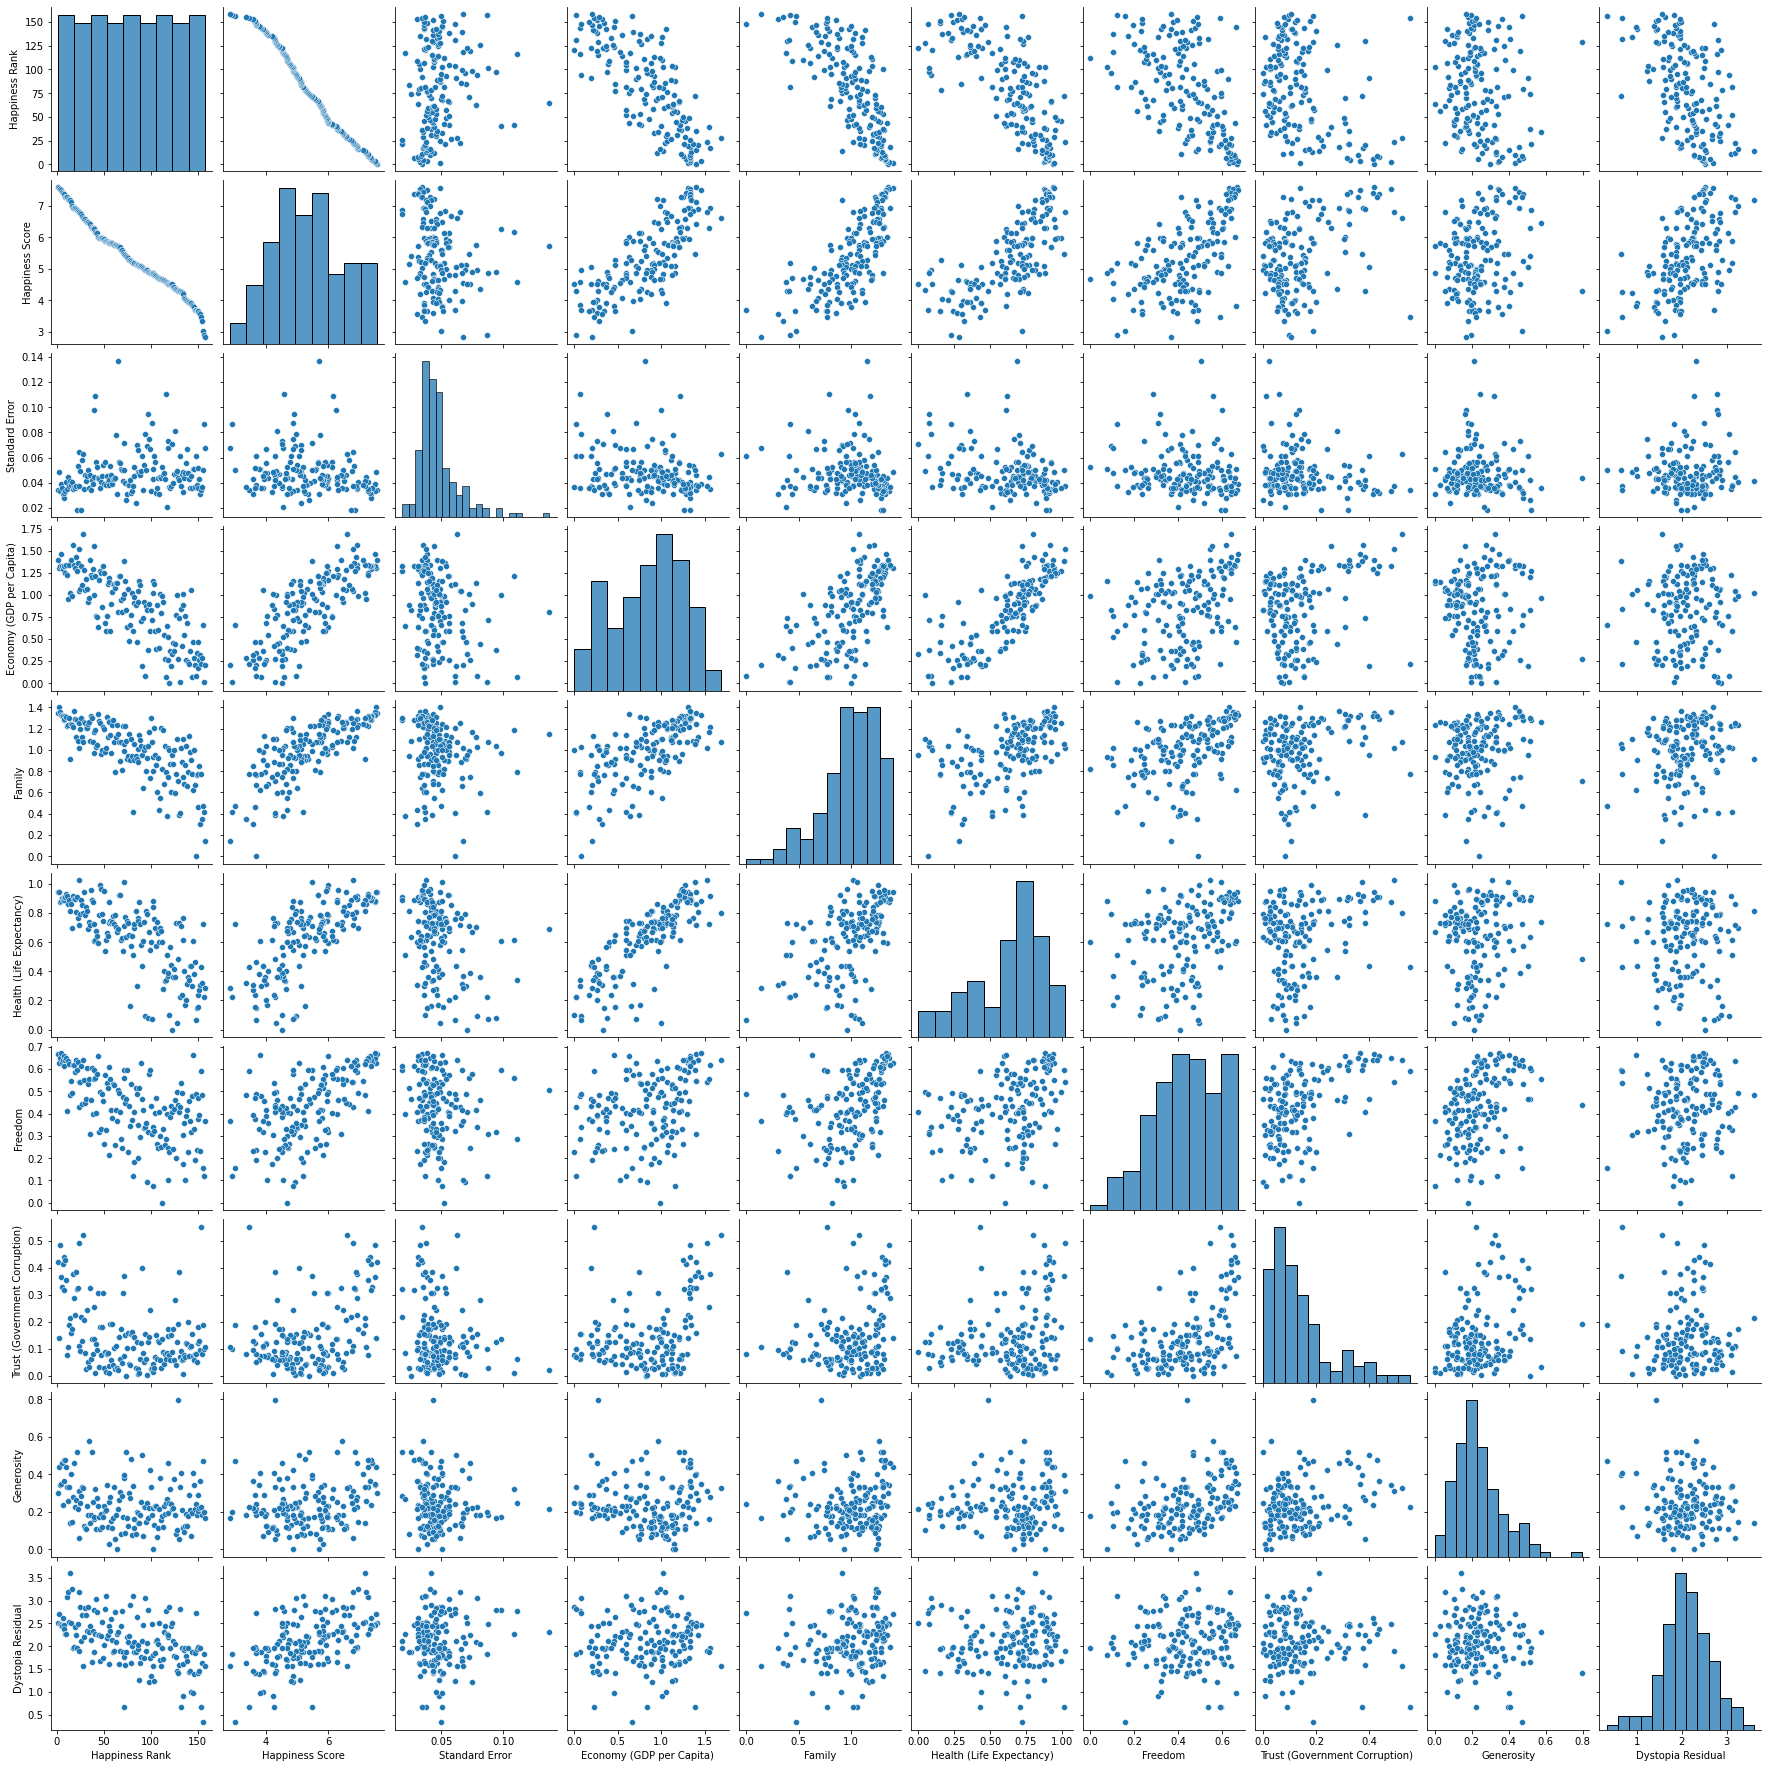

In [7]:
sns.pairplot(df)

**Country and Happiness Rank column dosent seem to be of importance**

In [8]:
df = df.drop(columns=['Country','Happiness Rank'])

In [9]:
df.shape

(158, 10)

Text(0.5, 1.0, 'Cardinality of Region column')

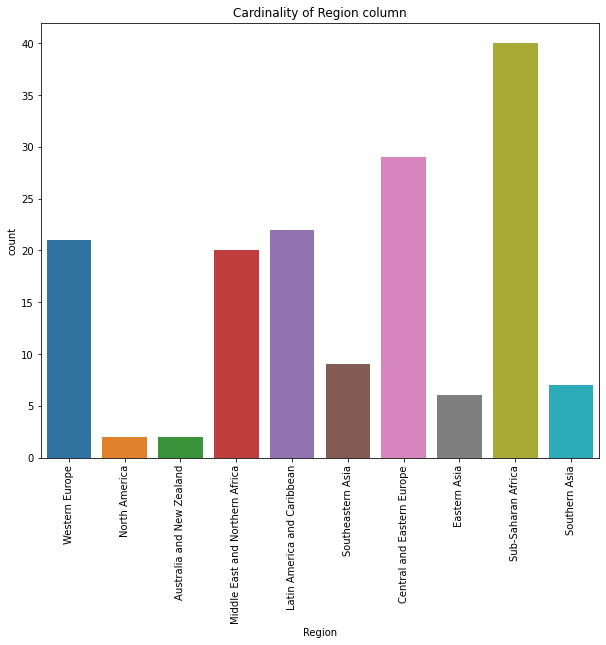

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df['Region'])
plt.xticks(rotation = 90)
plt.title('Cardinality of Region column')

Here we can see that Region columns have imbalanced categories

In [11]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder() # converting Region column to numeric data for processing

In [12]:
df2 = lab_enc.fit_transform(df['Region'])
df['Region'] = df2
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
df.corr() #lets find out the correlation between the columns

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


C:\Users\Abhimanyu\anaconda3\lib\site-packages\seaborn\matrix.py:308: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

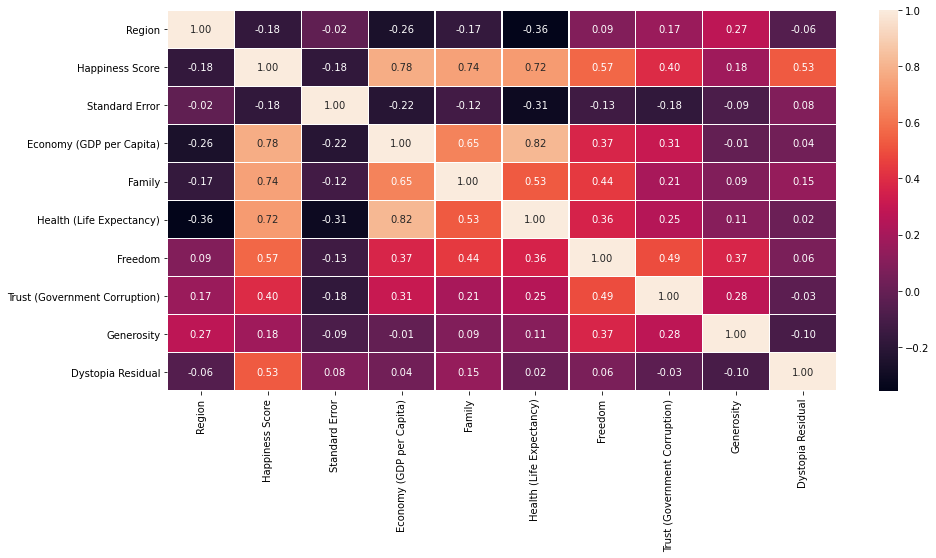

In [14]:
plt.figure (figsize = (15,7))
sns.heatmap (df.corr(), annot = True, Linewidths = 0.1, fmt = '.2f')

In [15]:
df.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


* Since count of each value is 158, therefore no missing values. 
* Data is symmetrically or normally distributed since mean and median(50%) are close to each other in all the columns. 
* Each column has variance close to zero except for Happiness score column. 
* There seem to be very few or no outliers present as there not much difference in the interquartile ranges.

### checking the skewness

In [16]:
df.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

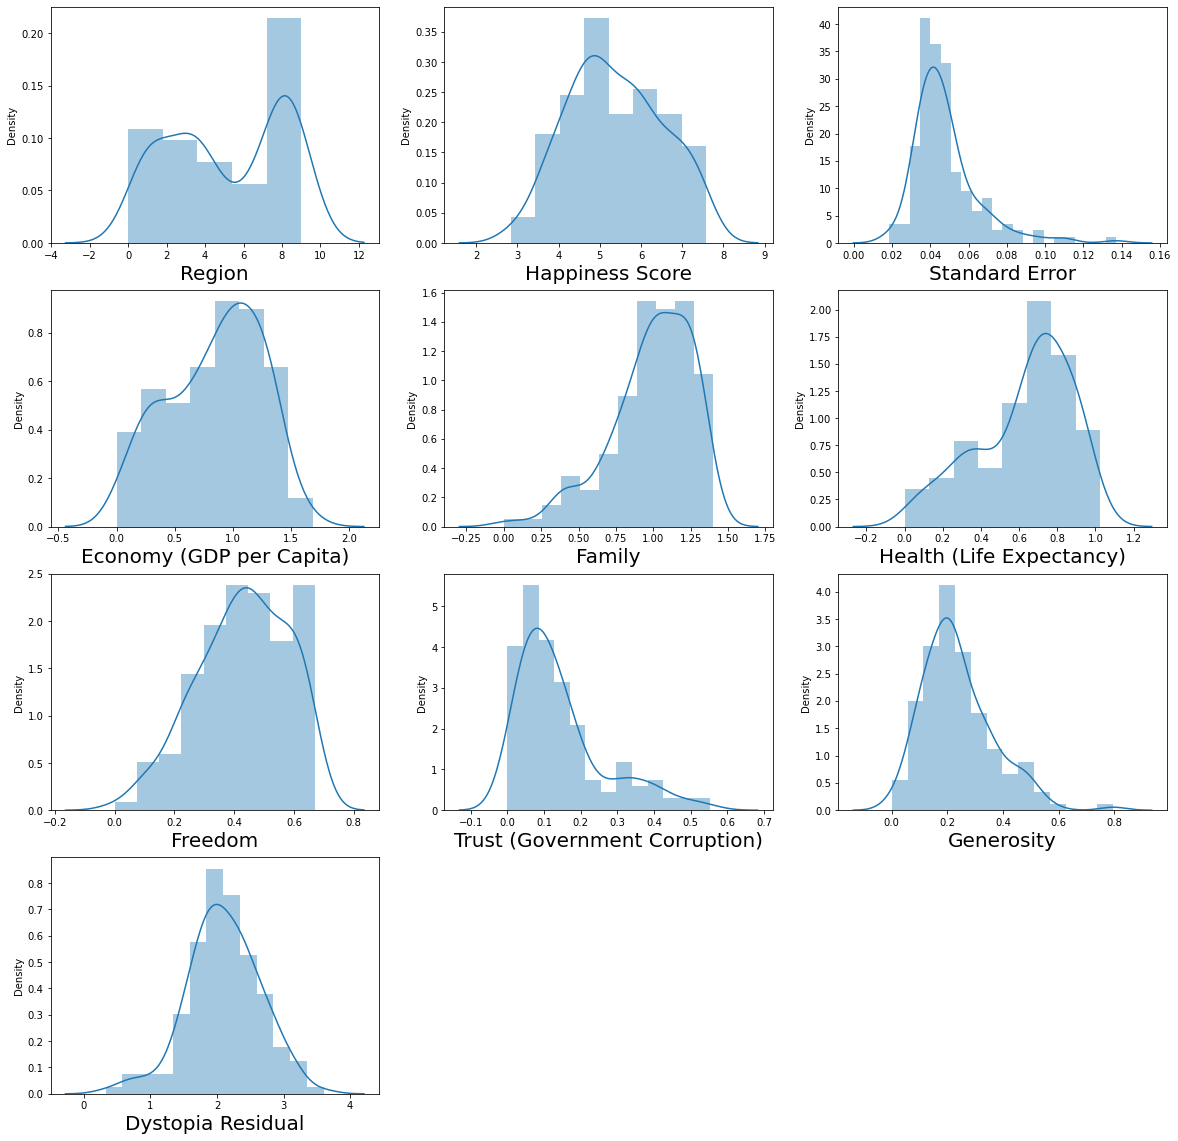

In [17]:
plt.figure(figsize = (20,20), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
    
plt.tight_layout

### checking for outliers

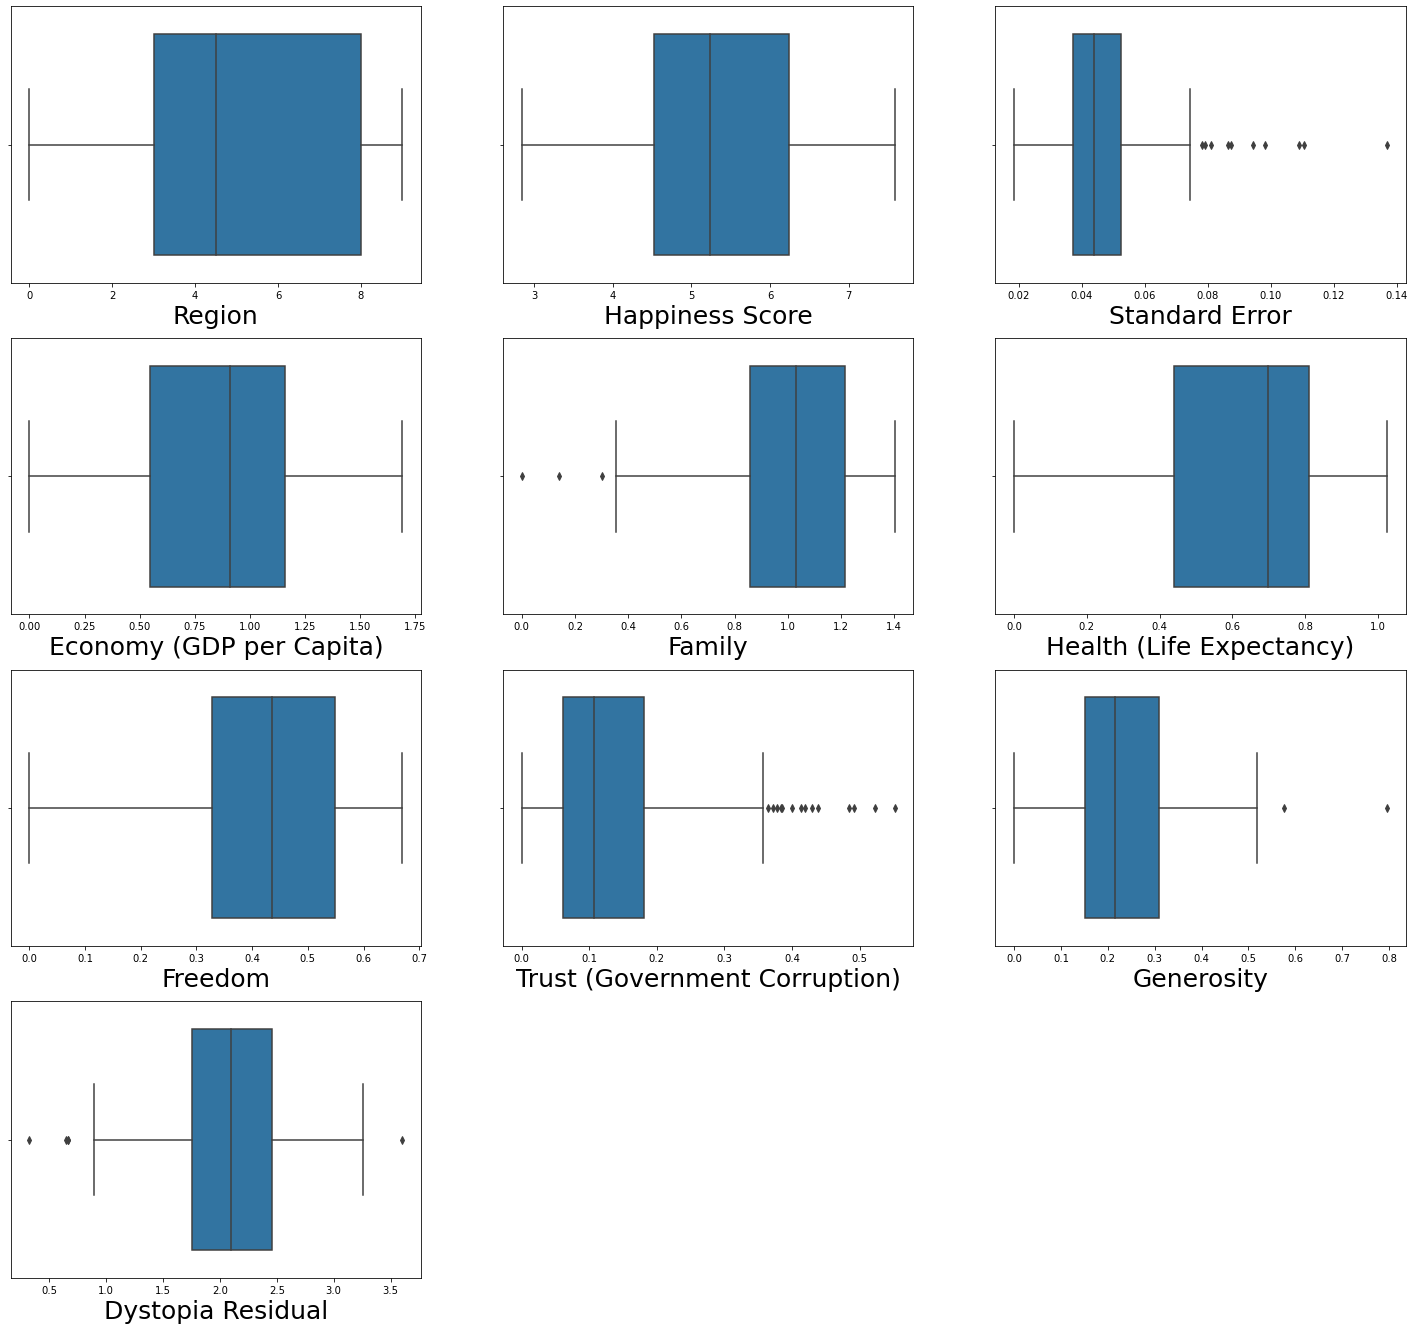

In [18]:
plt.figure(figsize = (25,60))
graph = 1

for column in df:
    if graph <=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient = 'h')
        plt.xlabel(column,fontsize=25)
        
    graph+=1  
    
plt.show()

From above boxplots we can conclude that there are outliers in Standard Error and Trust (Government Corruption) feature whereas, very few in Generosity and Dystopia Residual features.

In [19]:
df.shape

(158, 10)

#### Removing Outliers present in the dataset by zscore

In [20]:
from scipy.stats import zscore

z_score = zscore(df)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

In [21]:
df.shape

(149, 10)

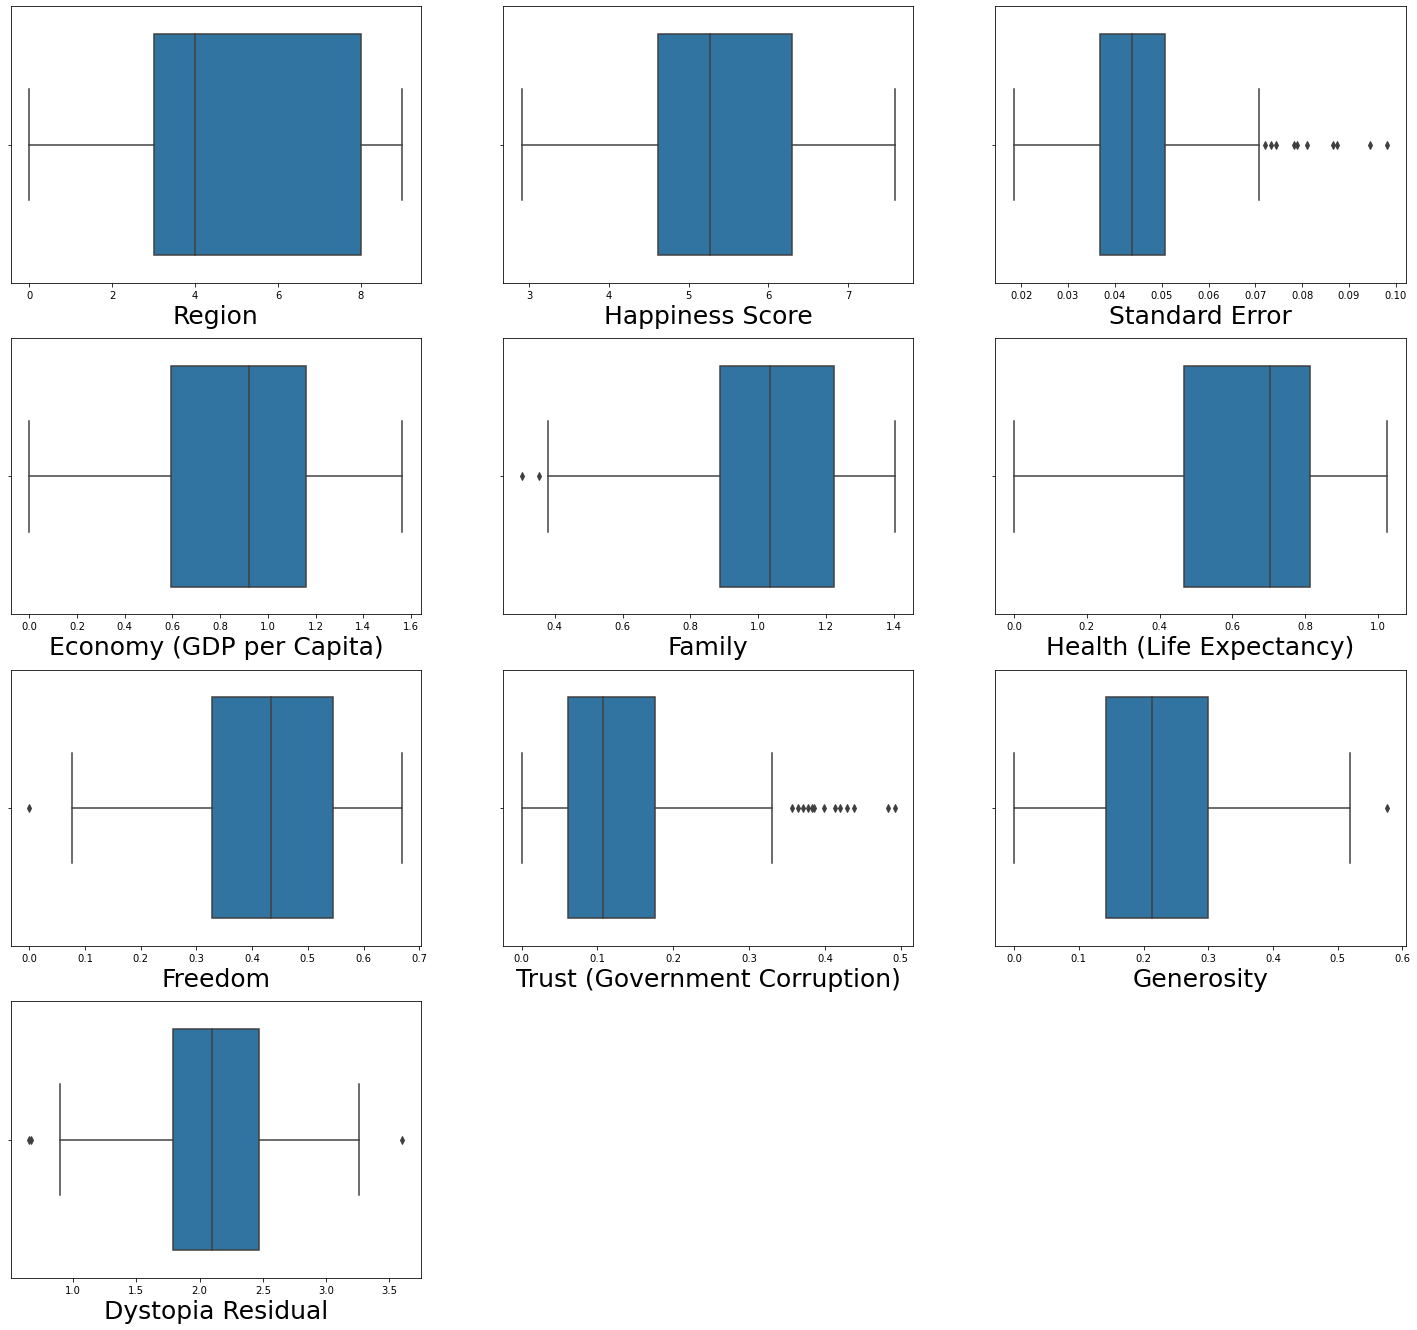

In [22]:
plt.figure(figsize = (25,60))
graph = 1

for column in df:
    if graph <=30:
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient = 'h')
        plt.xlabel(column,fontsize=25)
        
    graph+=1  
    
plt.show()

Even after removing outliers, there are some present but as the data size is not that big so its better not to remove outliers further.

In [23]:
df.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Since negative skewness is present i.e. data is left skewed, so we cannot use log transformation. Hence we have to use Power Transformer

In [24]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
dfpt=pt.fit_transform(df)
df=pd.DataFrame(dfpt,columns=df.columns)

In [25]:
df.skew()

Region                          -0.222589
Happiness Score                 -0.017940
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
dtype: float64

Now all the skew values are between -0.5 to +0.5

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

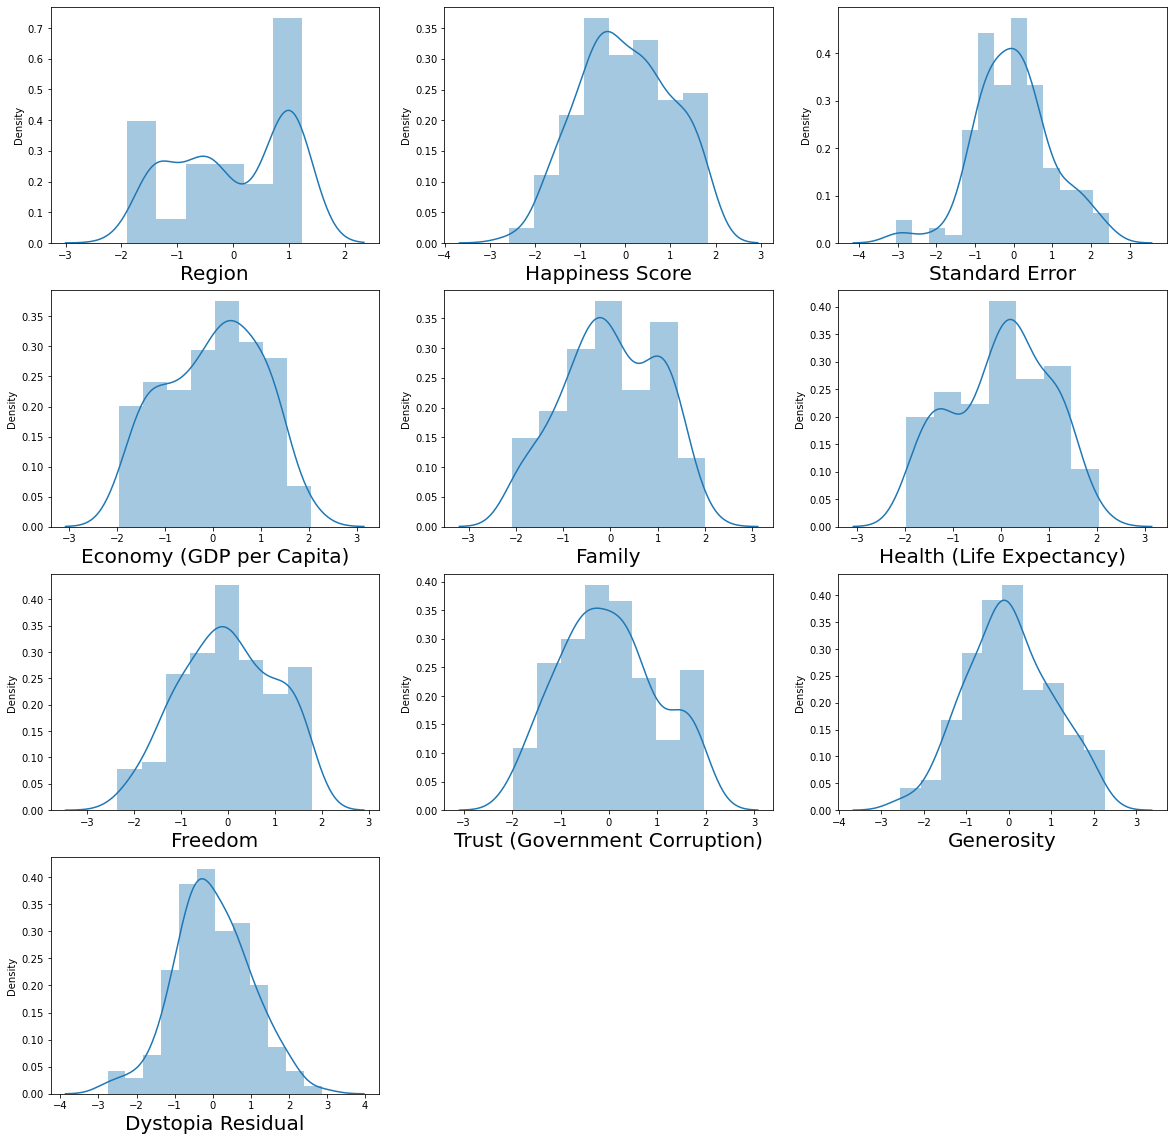

In [26]:
plt.figure(figsize = (20,20), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
    
plt.tight_layout

In [27]:
y = df['Happiness Score']

x = df.copy()
x.drop('Happiness Score',axis=1,inplace=True) 

# We have separated Dependent and Independet Features

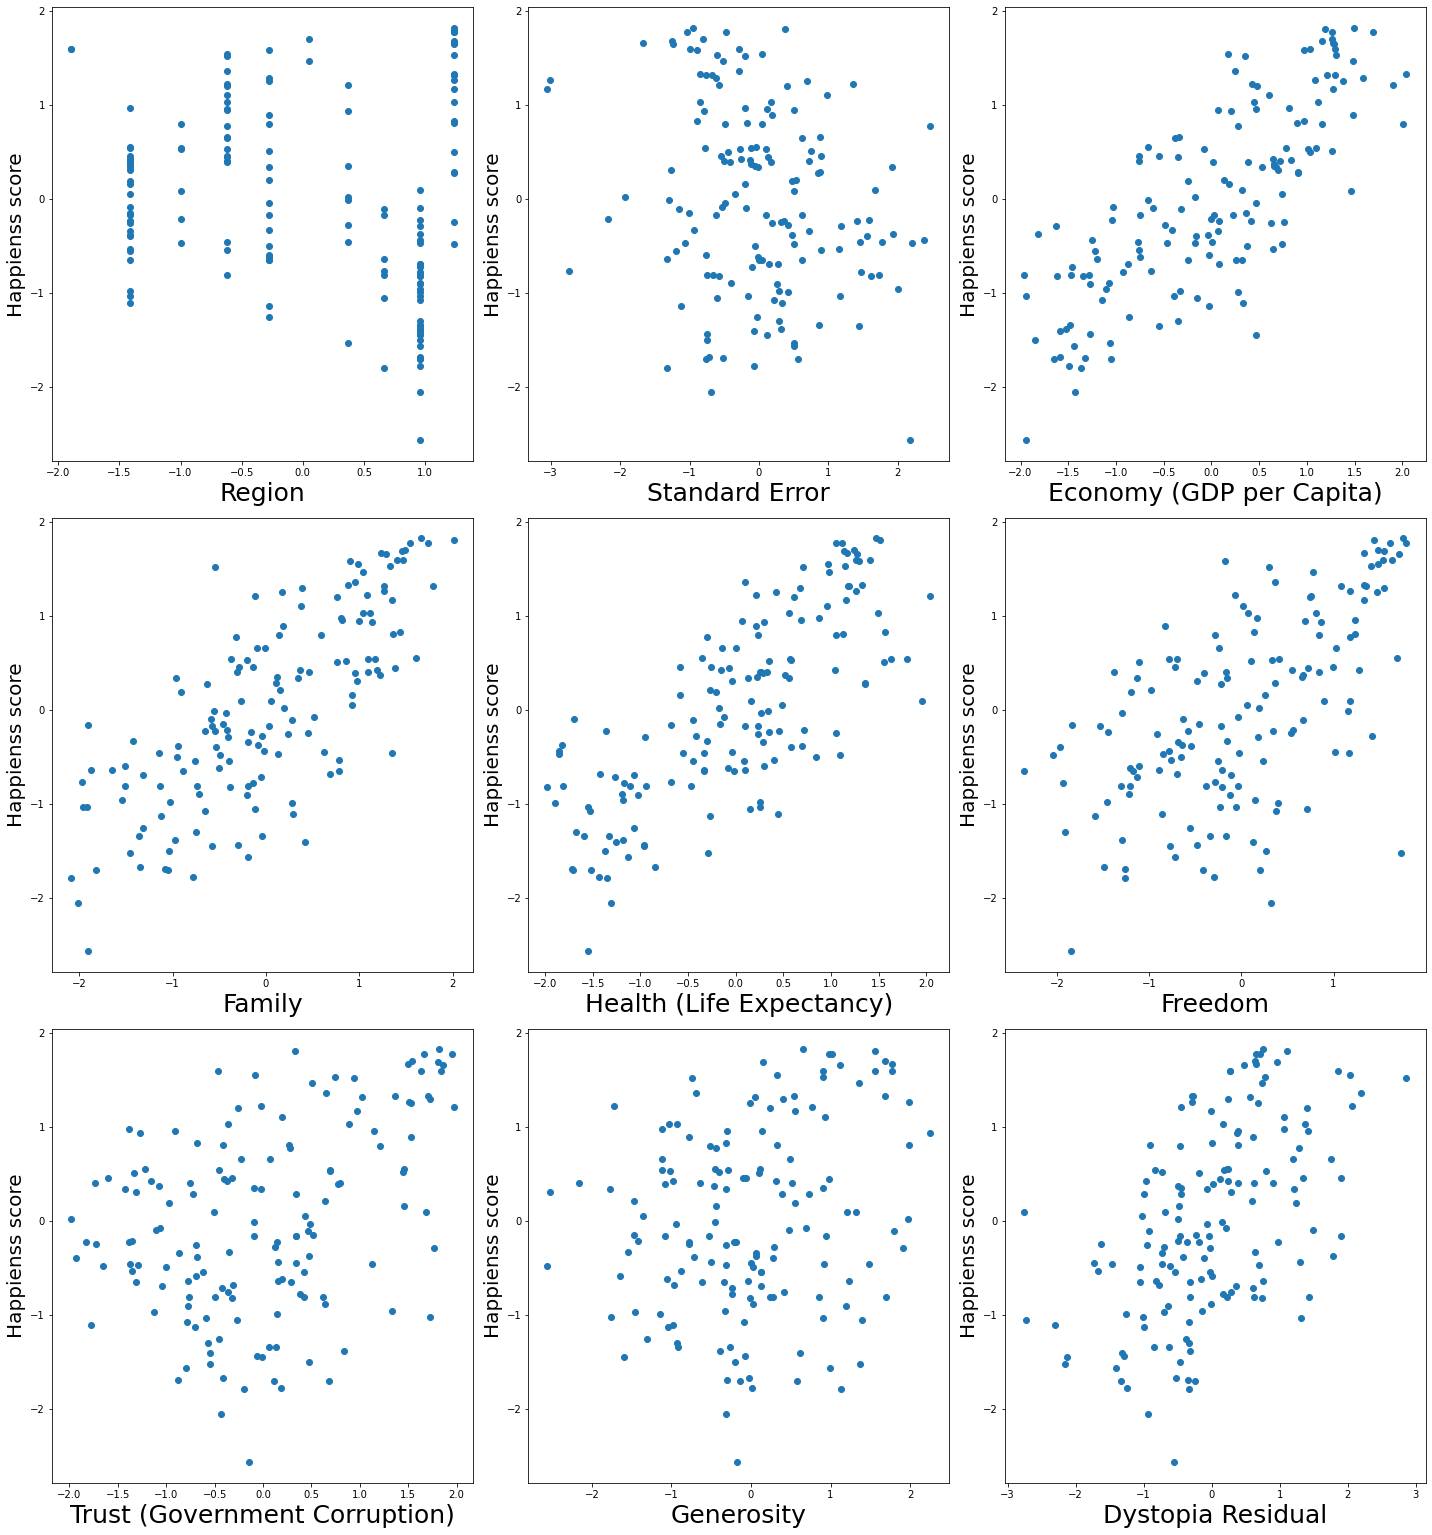

In [28]:
plt.figure(figsize = (20,35),facecolor = 'white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=25)
        plt.ylabel('Happienss score',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Model building:

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.22,random_state=41)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [33]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [34]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('----------------------------------------------------------------------------------------------------')

In [35]:
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 0.21306645971354
Mean squared error 0.0704939086791392
Root Mean squared error 0.26550689007846706
R2 Score 0.918878746927111
----------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.12640091640413567
Mean squared error 0.028711788479810096
Root Mean squared error 0.16944553248702102
R2 Score 0.9669597515148826
----------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.27626313729785945
Mean squared error 0.12698181759866775
Root Mean squared error 0.35634508218673056
R2 Score 0.853874975099441
----------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.07799793273057896
Mean squared error 0.010990355522611147
Root Mean squared error 0.10483489649258565
R2 Score 0.9873527879441505
--------------------------

In [36]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))


Minimum Mean Absolute error is shown by  LinearRegression() 0.07799793273057896
Minimum Mean squared error is shown by  LinearRegression() 0.010990355522611147
Minimum Root Mean squared error is shown by  LinearRegression() 0.10483489649258565
Maximun R2 Score is shown by  LinearRegression() 0.9873527879441505


In [37]:
from sklearn.model_selection import GridSearchCV

We try to perform hyperparameter tuning on ridge since it is also performing well

In [38]:
ridge=Ridge()
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m=GridSearchCV(ridge,param_grid,cv=10)
m.fit(x_train,y_train)
p=m.predict(x_test)
mae=mean_absolute_error(p,y_test)
mse=mean_squared_error(p,y_test)
rmse=np.sqrt(mean_squared_error(p,y_test))
r2=r2_score(y_test,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 0.0785958374428582
Mean squared error 0.011213995699852625
Root Mean squared error 0.10589615526473388
R2 Score 0.987095432780347


Ridge regression even after Hypertuning gives same result as Linear Regression model

**Hypertuning Adaboost classifier using base learner as Linear regression model**

In [39]:
param={'n_estimators':[50, 100, 150, 200, 250, 300],'learning_rate':[0.0001,0.001,0.01,.1,1,2,5,10]}
m=GridSearchCV(AdaBoostRegressor(base_estimator=LinearRegression()),param,cv=10,n_jobs=-2)
m.fit(x_train,y_train)
p=m.predict(x_test)
mae=mean_absolute_error(p,y_test)
mse=mean_squared_error(p,y_test)
rmse=np.sqrt(mean_squared_error(p,y_test))
r2=r2_score(y_test,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 0.08227438758081948
Mean squared error 0.012618158864242853
Root Mean squared error 0.11233057849153477
R2 Score 0.9854795842971455


#### It is also giving the same result as a single Linear Regression model so, we find that our simple linear model is the best model

### Finally creating the best model

In [40]:
m=LinearRegression()
m.fit(x,y)

LinearRegression()

In [41]:
import pickle
filename = 'World_Happ_Report.pkl'
pickle.dump(m,open (filename,'wb'))